In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import re

In [9]:
path='/home/heruhe/Desktop/Ga2o3/Frenkelpair/FP_beta/npt/O'
os.chdir(path) 
dfd=pd.read_csv('fp.out',sep=' ',header=None)
indexs=dfd.iloc[::2,2]
indexs[:100]

FileNotFoundError: [Errno 2] No such file or directory: '/home/heruhe/Desktop/Ga2o3/Frankpair/FP_beta/npt/O'

In [14]:
expression=''
for i in indexs[:12]:
    expression+='ParticleIdentifier=='+str(i)+'||'
expression

'ParticleIdentifier==971||ParticleIdentifier==453||ParticleIdentifier==638||ParticleIdentifier==812||ParticleIdentifier==1219||ParticleIdentifier==338||ParticleIdentifier==99||ParticleIdentifier==551||ParticleIdentifier==677||ParticleIdentifier==294||ParticleIdentifier==571||ParticleIdentifier==696||'

In [3]:
path='/Users/ruhe/Desktop/ga2o3/FP/O/log_file'
os.chdir(path) 
ape_O=np.zeros(2000)
for i in range(1,2001):

    fn2=str(i)+'.log'
    #custom step dt time temp press v_ape v_ake etotal c_FP_distance vol density
    #print $2,$4,$5,$6,$7,$8,$9,$10
    #for i in {1..2000}; do    gawk '$1=="ec" {print $2,$4,$5,$6,$7,$8,$9,$10,$11}' lammps.stdout$i > log_file/$i.log; done
#custom step dt time temp press v_ape v_ake v_avol etotal c_FP_distance
    log= pd.read_csv(fn2, sep=' ',header=None)
    log.columns=['Timestep','t','T','press','ape','ake','etotal','FP_distance']
    ape_O[i-1]=log['ape'][-1:]
path='/Users/ruhe/Desktop/ga2o3/FP/Ga/log_file'
os.chdir(path) 
ape_Ga=np.zeros(2000)
for i in range(1,2001):
    fn2=str(i)+'.log'
    #custom step dt time temp press v_ape v_ake etotal c_FP_distance
    log= pd.read_csv(fn2, sep=' ',header=None)
    log.columns=['Timestep','t','T','press','ape','ake','etotal','FP_distance']
    ape_Ga[i-1]=log['ape'][-1:]
path='/Users/ruhe/Desktop/ga2o3/FP/mix/log_file/log_file'
os.chdir(path) 
ape_mix=np.zeros(2000)
for i in range(1,2001):
    fn2=str(i)+'.log'
    #custom step dt time temp press v_ape v_ake etotal c_FP_distance
    log= pd.read_csv(fn2, sep=' ',header=None)
    log.columns=['Timestep','t','T','press','ape','ake','etotal','FP_distance']
    ape_mix[i-1]=log['ape'][-1:]

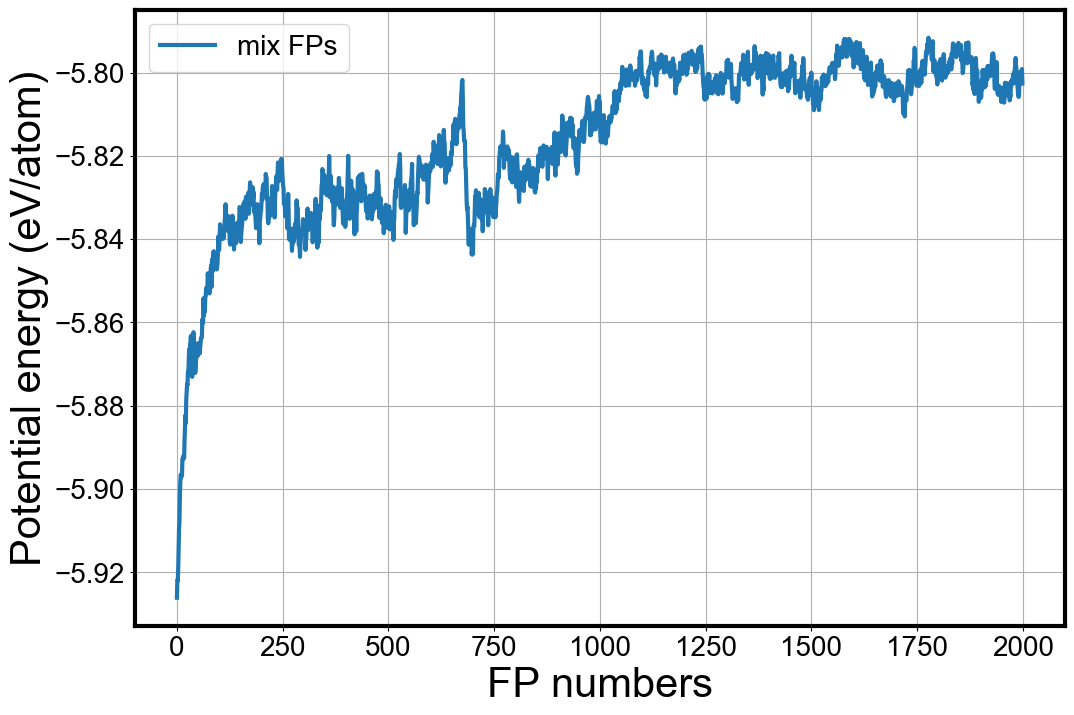

In [10]:
#plt.plot(ape_O,label='O FPs',linewidth=3)
plt.plot(ape_mix,label='mix FPs',linewidth=3)
#plt.plot(ape_Ga,label='Ga FPs',linewidth=3)
#plt.plot([i for i in range(601,1601)],ape_Ga_O,label='600Ga+O FPs',linewidth=3)
beta=[-7589.13172 /1280 for i in range(2001)]
#plt.plot([i for i in range(2001)],beta,linewidth=1, markersize=12,label='beta phase')
#amorph=[-5.828  for i in range(2001)]
#plt.plot([i for i in range(2001)],amorph,linewidth=1, markersize=12,label='armorph phase')
plt.xlabel('FP numbers',fontsize=30)
plt.ylabel('Potential energy (eV/atom)',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.rcParams["font.family"] = "arial"


In [16]:
x=-0.28728742684984987-24.501431697764776
y=-0.2928829751645178-24.978650441316788 
z=-0.27902258585651524-23.796561180905655 
v=x*y*z/1280
v

-11.782909390528882

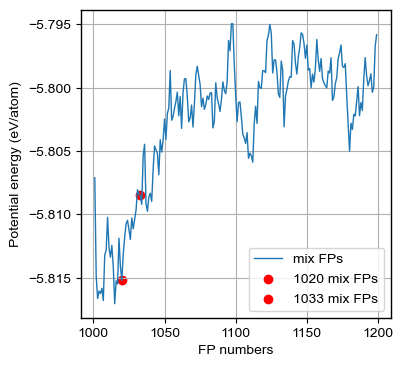

In [15]:
plt.plot([i for i in range(1001,1200)],ape_mix[1000:1199],label='mix FPs',linewidth=1)
plt.scatter(1020,ape_mix[1019],color='red',label='1020 mix FPs')
plt.scatter(1033,ape_mix[1032],color='red',label='1033 mix FPs')
plt.grid()
plt.xlabel('FP numbers',fontsize=10)
plt.ylabel('Potential energy (eV/atom)',fontsize=10)
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["figure.figsize"] = (4,4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.rcParams["font.family"] = "arial"


In [20]:
path='/Users/ruhe/Desktop/ga2o3/FP/Ga_O/log_file'
os.chdir(path) 
ape_Ga_O=np.zeros(1000)
for i in range(1,1001):

    fn2=str(i)+'.log'
    #custom step dt time temp press v_ape v_ake etotal c_FP_distance vol density
    #print $2,$4,$5,$6,$7,$8,$9,$10
    #for i in {1..2000}; do    gawk '$1=="ec" {print $2,$4,$5,$6,$7,$8,$9,$10,$11}' lammps.stdout$i > log_file/$i.log; done

    log= pd.read_csv(fn2, sep=' ',header=None)
    log.columns=['Timestep','t','T','press','ape','ake','etotal','FP_distance','vol']
    ape_Ga_O[i-1]=log['ape'][-1:]


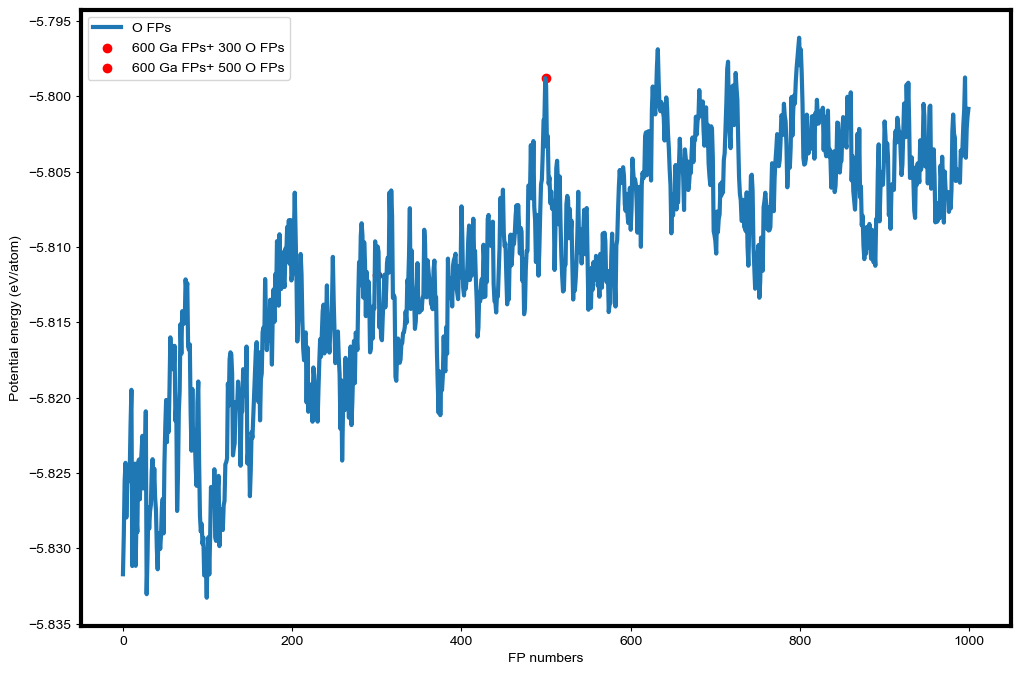

In [24]:
plt.plot(ape_Ga_O,label='O FPs',linewidth=3)

beta=[-7589.13172 /1280 for i in range(1001)]
#plt.plot([i for i in range(2001)],beta,linewidth=1, markersize=12,label='beta phase')
#amorph=[-5.828  for i in range(2001)]
#plt.plot([i for i in range(2001)],amorph,linewidth=1, markersize=12,label='armorph phase')
plt.xlabel('FP numbers',fontsize=30)
plt.ylabel('Potential energy (eV/atom)',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (12,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.rcParams["font.family"] = "arial"
plt.scatter(300,ape_Ga_O[299],color='red',label='600 Ga FPs+ 300 O FPs')
plt.scatter(500,ape_Ga_O[499],color='red',label='600 Ga FPs+ 500 O FPs')
plt.grid()
plt.xlabel('FP numbers',fontsize=10)
plt.ylabel('Potential energy (eV/atom)',fontsize=10)
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["figure.figsize"] = (4,4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.rcParams["font.family"] = "arial"